## Homework7

In [28]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [29]:
img1 = cv2.imread('book.png', 0)
img2 = cv2.imread('books.jpg', 0)
sift = cv2.SIFT_create()

In [30]:
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

In [31]:
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)

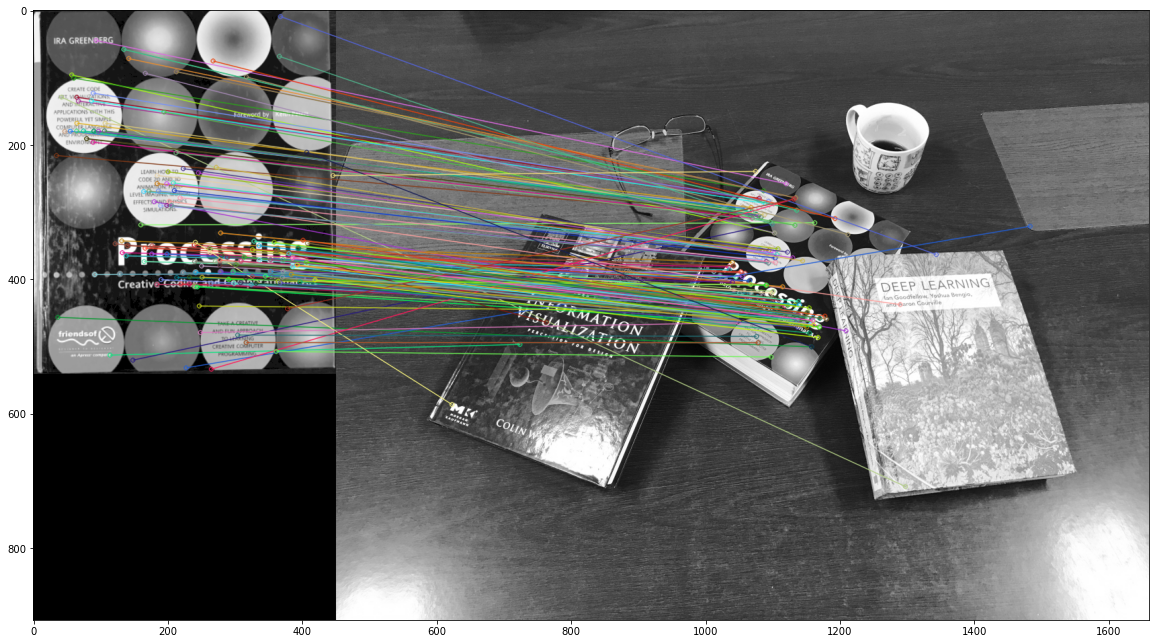

(<matplotlib.image.AxesImage at 0x27b0000c160>, None)

In [32]:
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=2)
plt.figure(figsize=(20,15))
plt.imshow(img3),plt.show()        